In [73]:
# Dependencies and Setup
%matplotlib inline
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

# Hide warning messages in notebook
import warnings
warnings.filterwarnings('ignore')

# File to Load (Remember to Change These)
mouse_drug_data_to_load = "data/mouse_drug_data.csv"
clinical_trial_data_to_load = "data/clinicaltrial_data.csv"

# Read the Mouse and Drug Data and the Clinical Trial Data
mouse_drug_data = pd.read_csv(mouse_drug_data_to_load)
clinical_trial_data = pd.read_csv(clinical_trial_data_to_load)

# Combine the data into a single dataset
combined_data = pd.merge(clinical_trial_data, mouse_drug_data, on="Mouse ID", how="left")

# Display the data table for preview
combined_data.head()


,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug
0,b128,0,45.0,0,Capomulin
1,f932,0,45.0,0,Ketapril
2,g107,0,45.0,0,Ketapril
3,a457,0,45.0,0,Ketapril
4,c819,0,45.0,0,Ketapril


## Tumor Response to Treatment

In [74]:
# Store the Mean Tumor Volume Data Grouped by Drug and Timepoint 
mean_tumor = combined_data.groupby(["Drug","Timepoint"]).mean()

# Convert to DataFrame
df_tumor = pd.DataFrame(mean_tumor)
df_tumor = df_tumor.drop(columns=["Metastatic Sites"])

# Preview DataFrame
df_tumor.head()

Tumor Volume (mm3)
Drug      Timepoint                    
Capomulin 0                   45.000000
          5                   44.266086
          10                  43.084291
          15                  42.064317
          20                  40.716325

In [75]:
# Store the Standard Error of Tumor Volumes Grouped by Drug and Timepoint
se_tumor = combined_data.groupby(["Drug", "Timepoint"]).sem()

# Convert to DataFrame
df_se = pd.DataFrame(se_tumor)
df_se = df_se.drop(columns=["Metastatic Sites","Mouse ID"])

# Preview DataFrame
df_se.head()

Tumor Volume (mm3)
Drug      Timepoint                    
Capomulin 0                    0.000000
          5                    0.448593
          10                   0.702684
          15                   0.838617
          20                   0.909731

In [76]:
# Minor Data Munging to Re-Format the Data Frames
new_df_tumor = df_tumor.pivot_table(index = "Timepoint", columns = "Drug", values = "Tumor Volume (mm3)")

# Preview that Reformatting worked
new_df_tumor.head()

Drug,Capomulin,Ceftamin,Infubinol,Ketapril,Naftisol,Placebo,Propriva,Ramicane,Stelasyn,Zoniferol
Timepoint,,,,,,,,,,
0,45.000000,45.000000,45.000000,45.000000,45.000000,45.000000,45.000000,45.000000,45.000000,45.000000
5,44.266086,46.503051,47.062001,47.389175,46.796098,47.125589,47.248967,43.944859,47.527452,46.851818
10,43.084291,48.285125,49.403909,49.582269,48.694210,49.423329,49.101541,42.531957,49.463844,48.689881
15,42.064317,50.094055,51.296397,52.399974,50.933018,51.359742,51.067318,41.495061,51.529409,50.779059
20,40.716325,52.157049,53.197691,54.920935,53.644087,54.364417,53.346737,40.238325,54.067395,53.170334


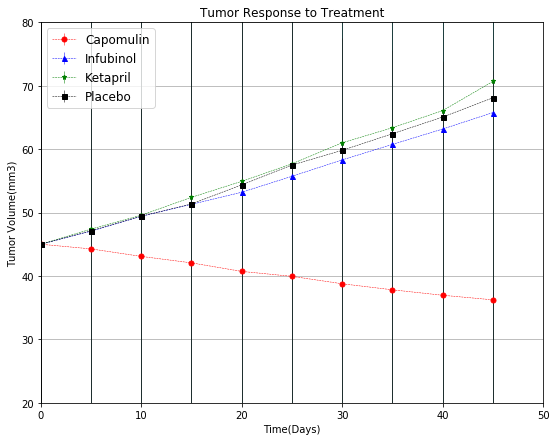

In [77]:
# Generate the Plot (with Error Bars)
plt.figure(figsize=(9,7))
plt.errorbar(new_df_tumor.index, new_df_tumor['Capomulin'], yerr=new_df_tumor['Capomulin'],
           color='r', marker='o', markersize=5,linestyle='--',  linewidth=0.50)
plt.errorbar(new_df_tumor.index, new_df_tumor['Infubinol'], yerr=new_df_tumor['Infubinol'],
           color='b', marker='^', markersize=5,linestyle='--',  linewidth=0.50)
plt.errorbar(new_df_tumor.index, new_df_tumor['Ketapril'], yerr=new_df_tumor['Ketapril'],
           color='g', marker='*', markersize=5, linestyle='--', linewidth=0.50)
plt.errorbar(new_df_tumor.index, new_df_tumor['Placebo'], yerr=new_df_tumor['Placebo'],
           color='black', marker='s', markersize=5,linestyle='--',  linewidth=0.50)

plt.xlim(0,50)
plt.ylim(20,80)
plt.title("Tumor Response to Treatment")
plt.xlabel("Time(Days)")
plt.ylabel("Tumor Volume(mm3)")

plt.grid(axis = "y")
plt.legend(['Capomulin','Infubinol', 'Ketapril','Placebo'],loc='best', fontsize=12, fancybox=True)

# Save the Figure
plt.savefig("../Images/Tumor_Response.png")


In [78]:
# Show the Figure
plt.show()

![Tumor Response to Treatment](../Images/treatment.png)

## Metastatic Response to Treatment

In [79]:
# Store the Mean Met. Site Data Grouped by Drug and Timepoint 
mean_met = combined_data.groupby(["Drug","Timepoint"]).mean()

# Convert to DataFrame
df_met = pd.DataFrame(mean_met)
df_met = df_met.drop(columns=["Tumor Volume (mm3)"])

# Preview DataFrame
df_met.head()

Metastatic Sites
Drug      Timepoint                  
Capomulin 0                  0.000000
          5                  0.160000
          10                 0.320000
          15                 0.375000
          20                 0.652174

In [80]:
# Store the Standard Error associated with Met. Sites Grouped by Drug and Timepoint 
se_met = combined_data.groupby(["Drug", "Timepoint"]).sem()

# Convert to DataFrame
df_se_met = pd.DataFrame(se_met)
df_se_met = df_se_met.drop(columns=["Tumor Volume (mm3)","Mouse ID"])

# Preview DataFrame
df_se_met.head()

Metastatic Sites
Drug      Timepoint                  
Capomulin 0                  0.000000
          5                  0.074833
          10                 0.125433
          15                 0.132048
          20                 0.161621

In [81]:
# Minor Data Munging to Re-Format the Data Frames
new_df_meta = df_met.pivot_table(index = "Timepoint", columns = "Drug", values = "Metastatic Sites")

# Preview that Reformatting worked
new_df_meta.head()

Drug,Capomulin,Ceftamin,Infubinol,Ketapril,Naftisol,Placebo,Propriva,Ramicane,Stelasyn,Zoniferol
Timepoint,,,,,,,,,,
0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
5,0.160000,0.380952,0.280000,0.304348,0.260870,0.375000,0.320000,0.120000,0.240000,0.166667
10,0.320000,0.600000,0.666667,0.590909,0.523810,0.833333,0.565217,0.250000,0.478261,0.500000
15,0.375000,0.789474,0.904762,0.842105,0.857143,1.250000,0.764706,0.333333,0.782609,0.809524
20,0.652174,1.111111,1.050000,1.210526,1.150000,1.526316,1.000000,0.347826,0.952381,1.294118


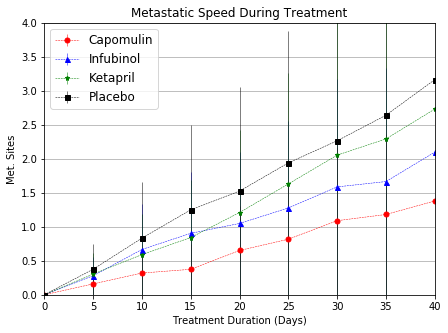

In [82]:
# Generate the Plot (with Error Bars)
plt.figure(figsize=(7,5))
plt.errorbar(new_df_meta.index, new_df_meta['Capomulin'], yerr=new_df_meta['Capomulin'],
           color='r', marker='o', markersize=5,linestyle='--',  linewidth=0.50)
plt.errorbar(new_df_meta.index, new_df_meta['Infubinol'], yerr=new_df_meta['Infubinol'],
           color='b', marker='^', markersize=5,linestyle='--',  linewidth=0.50)
plt.errorbar(new_df_meta.index, new_df_meta['Ketapril'], yerr=new_df_meta['Ketapril'],
           color='g', marker='*', markersize=5, linestyle='--', linewidth=0.50)
plt.errorbar(new_df_meta.index, new_df_meta['Placebo'], yerr=new_df_meta['Placebo'],
           color='black', marker='s', markersize=5,linestyle='--',  linewidth=0.50)

plt.xlim(0,40)
plt.ylim(0.0,4.0)
plt.title("Metastatic Speed During Treatment")
plt.xlabel("Treatment Duration (Days)")
plt.ylabel("Met. Sites")
plt.grid(axis = "y")
plt.legend(['Capomulin','Infubinol', 'Ketapril','Placebo'],loc='best', fontsize=12, fancybox=True)

# Save the Figure
plt.savefig("../Images/Metastatic_Response.png")

# Show the Figure
plt.show()

![Metastatic Spread During Treatment](../Images/spread.png)

## Survival Rates

In [83]:
# Store the Count of Mice Grouped by Drug and Timepoint (W can pass any metric)
mice_count = combined_data.groupby(["Drug","Timepoint"]).count()

# Convert to DataFrame
df_mice = pd.DataFrame(mice_count)
df_mice = df_mice.drop(columns=["Metastatic Sites", "Tumor Volume (mm3)"])

# Preview DataFrame
df_mice.head()

Mouse ID
Drug      Timepoint          
Capomulin 0                25
          5                25
          10               25
          15               24
          20               23

In [84]:
# Minor Data Munging to Re-Format the Data Frames
new_df_mice = df_mice.pivot_table(index = "Timepoint", columns = "Drug", values = "Mouse ID")

# Preview the Data Frame

new_df_mice

Drug,Capomulin,Ceftamin,Infubinol,Ketapril,Naftisol,Placebo,Propriva,Ramicane,Stelasyn,Zoniferol
Timepoint,,,,,,,,,,
0,25,25,25,25,25,25,26,25,26,25
5,25,21,25,23,23,24,25,25,25,24
10,25,20,21,22,21,24,23,24,23,22
15,24,19,21,19,21,20,17,24,23,21
20,23,18,20,19,20,19,17,23,21,17
25,22,18,18,19,18,17,14,23,19,16
30,22,16,17,18,15,15,13,23,18,15
35,22,14,12,17,15,14,10,21,16,14
40,21,14,10,15,15,12,9,20,12,14


In [85]:
new_df = (new_df_mice/new_df_mice.iloc[0]).round(0)*100
new_df

Drug,Capomulin,Ceftamin,Infubinol,Ketapril,Naftisol,Placebo,Propriva,Ramicane,Stelasyn,Zoniferol
Timepoint,,,,,,,,,,
0,100.0,100.0,100.0,100.0,100.0,100.0,100.0,100.0,100.0,100.0
5,100.0,100.0,100.0,100.0,100.0,100.0,100.0,100.0,100.0,100.0
10,100.0,100.0,100.0,100.0,100.0,100.0,100.0,100.0,100.0,100.0
15,100.0,100.0,100.0,100.0,100.0,100.0,100.0,100.0,100.0,100.0
20,100.0,100.0,100.0,100.0,100.0,100.0,100.0,100.0,100.0,100.0
25,100.0,100.0,100.0,100.0,100.0,100.0,100.0,100.0,100.0,100.0
30,100.0,100.0,100.0,100.0,100.0,100.0,0.0,100.0,100.0,100.0
35,100.0,100.0,0.0,100.0,100.0,100.0,0.0,100.0,100.0,100.0
40,100.0,100.0,0.0,100.0,100.0,0.0,0.0,100.0,0.0,100.0


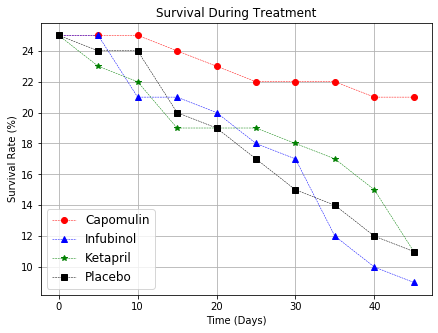

In [86]:
# Generate the Plot (Accounting for percentages)

plt.figure(figsize=(7,5))
plt.plot(new_df.index, new_df_mice['Capomulin'], label='Capomulin',
         color='r', marker='o', linestyle='--',  linewidth=0.50)
plt.plot(new_df.index, new_df_mice['Infubinol'], label='Infubinol',
         color='b', marker='^', linestyle='--',  linewidth=0.50)
plt.plot(new_df.index, new_df_mice['Ketapril'], label='Ketapril',
         color='g', marker='*', linestyle='--', linewidth=0.50)
plt.plot(new_df.index, new_df_mice['Placebo'], label='Placebo',
         color='black', marker='s', linestyle='--',  linewidth=0.50)

plt.title("Survival During Treatment")
plt.xlabel("Time (Days)")
plt.ylabel("Survival Rate (%)")
plt.grid()
plt.legend(['Capomulin','Infubinol', 'Ketapril','Placebo'],loc='best', fontsize=12)

# Save the Figure
plt.savefig("../Images/Survival_Rate.png")

# Show the Figure
plt.show()

![Metastatic Spread During Treatment](../Images/survival.png)

## Summary Bar Graph

In [87]:
# Calculate the percent changes for each drug
percent_change = (new_df_tumor.iloc[9,:]- new_df_tumor.iloc[0,:])/new_df_tumor.iloc[0,:]*100

# Display the data to confirm
percent_change

Drug
Capomulin   -19.475303
Ceftamin     42.516492
Infubinol    46.123472
Ketapril     57.028795
Naftisol     53.923347
Placebo      51.297960
Propriva     47.241175
Ramicane    -22.320900
Stelasyn     52.085134
Zoniferol    46.579751
dtype: float64

In [88]:
df_bargraph = percent_change[['Capomulin','Infubinol', 'Ketapril','Placebo']]
df_bargraph

Drug
Capomulin   -19.475303
Infubinol    46.123472
Ketapril     57.028795
Placebo      51.297960
dtype: float64

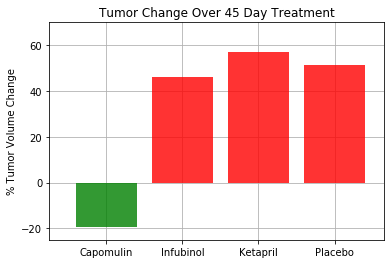

In [91]:
# Store all Relevant Percent Changes into a Tuple
x_axis = np.arange(len(df_bargraph)) # x-axis count

plt.bar(x_axis,
      df_bargraph,
      color=['red' if df_bargraph[c] > 0
             else
             'green' for c in x_axis],
      alpha=0.8,
      align="center",
      zorder=3 #hides the gridlines behind the bar chart
     )

tick_locations = [value for value in x_axis]
plt.xticks(tick_locations, ['Capomulin','Infubinol', 'Ketapril','Placebo'])
plt.xlim(-0.75, len(x_axis)-.35)
plt.ylim(-25,70)
plt.title("Tumor Change Over 45 Day Treatment")
plt.ylabel("% Tumor Volume Change")
plt.grid()

# Save the Figure
plt.savefig("../Images/Summary_Graph.png")

![Metastatic Spread During Treatment](../Images/change.png)